In [1]:
import os
import pandas as pd
wd = "Radiosensitivity Prediction"
download_dir = f"{wd}/data"
data_dir = f"{download_dir}/Cleveland"
run_dir = f"{wd}/runs_methylation/hugo_genes_all_2"

def aggregate_results(tag):
    results_path = os.path.join(run_dir, tag, "results.csv")
    output_path = os.path.join(run_dir, tag, "aggregated_test_results.csv")

    if os.path.exists(results_path):
        df = pd.read_csv(results_path, index_col=0)
    else:
        print(f"results.csv not found at: {results_path}")

    test_df = df[df['index'] == "test"]
    test_df = test_df.select_dtypes(include='number')
    mean_scores = test_df.mean()
    std_scores = test_df.std()

    summary_df = pd.DataFrame({
        "mean": mean_scores,
        "std": std_scores
    })
    summary_df.index.name = 'metric'
    summary_df.to_csv(output_path)
aggregate_results("dense_2layers")


In [3]:
df = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_gene_expression.csv')
print(df.shape)
df.head()


(511, 61959)


,Tumor_Sample_Barcode,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,GS1-103B18.1.1,MIR371B,PHKA1-AS1.1,AL353583.1,CTD-2557P19.4.1,ITFG3.1,C1S.1,AC007375.1,BRCC3.1,VN1R79P.1
0,SKNFI,0.332,0.014,5.887,2.239,3.571,0.052,0.108,5.173,3.626,...,0,0.0,0,0.00,0,0,0,0.110,0,0.0
1,IMR32,4.242,0.803,5.233,2.298,3.099,0.000,0.029,0.160,5.003,...,0,0.0,0,0.00,0,0,0,0.063,0,0.0
2,SKNAS,0.190,0.000,5.799,2.856,3.702,0.003,0.693,4.615,3.551,...,0,0.0,0,0.00,0,0,0,0.000,0,0.0
3,CHP212,4.206,0.000,5.347,3.024,3.906,0.000,3.022,4.699,4.354,...,0,0.0,0,0.00,0,0,0,0.000,0,0.0
4,KPNSI9S,3.455,0.138,5.921,2.911,3.975,0.000,5.100,5.161,3.432,...,0,0.0,0,0.12,0,0,0,0.001,0,0.0


## 1. filter the columns that have zeros

In [4]:
# Count how many zeros each column has
zero_counts = (df == 0.0).astype(int).sum(axis=0)

# Filter out columns with more than 20 zeros
cols_to_keep = zero_counts[zero_counts <= 20].index

# Create new DataFrame without those columns
df_filtered = df[cols_to_keep]

In [5]:
df_filtered

,Tumor_Sample_Barcode,TSPAN6,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,...,RP11-145M9.4,RP11-345P4.7,RP11-178G16.5,FLJ20306,AC010327.2,KCNQ1OT1,CTD-3099C6.9,RP11-15H20.5,EGLN2,CTD-2583A14.8
0,SKNFI,0.332,5.887,2.239,3.571,0.108,5.173,3.626,4.612,2.101,...,2.129,0.945,3.331,0.036,1.339,0.041,1.899,3.068,4.705,1.128
1,IMR32,4.242,5.233,2.298,3.099,0.029,0.160,5.003,5.542,0.063,...,2.857,0.638,2.767,0.139,1.212,0.184,2.399,2.720,5.037,1.446
2,SKNAS,0.190,5.799,2.856,3.702,0.693,4.615,3.551,5.077,2.152,...,0.500,1.298,2.787,0.132,1.416,0.196,0.696,1.548,4.736,1.580
3,CHP212,4.206,5.347,3.024,3.906,3.022,4.699,4.354,4.737,1.613,...,3.829,1.087,2.409,0.065,0.820,0.289,2.465,1.460,4.714,1.689
4,KPNSI9S,3.455,5.921,2.911,3.975,5.100,5.161,3.432,4.177,1.198,...,2.964,0.262,2.065,0.200,1.061,0.490,1.001,0.581,4.434,1.405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,WM983B,2.852,6.628,1.984,3.163,0.029,5.453,3.848,4.051,2.608,...,3.429,1.073,2.744,0.229,1.030,0.540,1.822,0.073,4.570,0.935
507,PECAPJ34CLONEC12,3.775,5.790,1.498,3.475,2.036,5.864,4.794,3.067,2.927,...,3.045,0.114,1.271,0.158,0.329,0.023,0.000,0.210,4.214,0.660
508,PECAPJ41CLONED2,4.231,5.415,1.584,3.174,3.615,6.404,3.643,3.377,2.375,...,2.264,0.123,1.253,0.148,0.457,0.001,0.020,0.029,4.445,0.901
509,ISHIKAWAHERAKLIO02ER,5.081,5.225,1.760,3.102,0.628,6.547,4.400,3.868,2.426,...,1.868,2.120,2.300,0.164,1.103,0.273,2.014,2.460,4.996,1.872


## 2. filter the columns that have small vatriance

In [6]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


df_numeric = df_filtered.select_dtypes(include=[float, int])

# Step 3: Save original row index (cell line names)
row_names = df['Tumor_Sample_Barcode']

# Step 4: Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
rna_reduced = selector.fit_transform(df_numeric)

# Step 5: Reconstruct DataFrame with correct row and column names
selected_cols = df_numeric.columns[selector.get_support()]
rna_reduced_df = pd.DataFrame(rna_reduced, columns=selected_cols, index=row_names)

c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Combine with histone bc I cant be arsed


In [11]:
df_h = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/histone_modification_data_dropna.csv')
df_h.head()

,CellLineName,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,DMS53,0.116020,-0.153144,-0.348607,-1.417128,-1.281177,-0.719707,-0.208080,-0.033416,-0.967821,...,0.396178,1.261963,0.492776,-0.211349,-0.554973,-0.222912,-0.310910,-0.272655,0.271469,0.469647
1,UMUC3,-0.326129,-0.086690,0.713623,0.066648,0.421013,-0.223507,-1.075759,-0.258696,0.669569,...,-0.850831,-0.791398,-0.790837,0.096298,-0.135126,-0.291408,-0.186947,-0.441485,-0.272371,-0.534437
2,OV56,-0.122175,-0.024343,0.202084,-1.029044,0.221817,0.005454,0.207774,0.242658,0.978543,...,0.529533,0.292049,0.670823,-0.131333,0.364411,-0.174332,0.260027,0.058613,-0.058042,0.131209
3,KLE,-0.732957,0.351843,0.256152,-1.483163,-0.216649,-0.260318,-0.391316,0.946372,-0.621244,...,-1.771020,-1.304536,-1.096219,0.061822,0.173966,0.204456,-0.307813,-0.078139,-0.042866,-0.359874
4,RERFLCAD2,-0.316811,0.034429,-0.478413,-0.508834,0.376827,0.117083,0.558105,0.700461,0.714818,...,0.031050,0.114207,0.020411,0.444386,1.124058,0.057295,0.075244,0.032251,0.176700,-0.010794


In [ ]:
# from sklearn.feature_selection import VarianceThreshold

In [ ]:
# selector = VarianceThreshold(threshold=0.1)
# histone_reduced = selector.fit_transform(df_h.iloc[:, 1:])
# histone_reduced.shape

(242, 40)

In [11]:
# Step 1: Rename key columns for consistency
rna = rna_reduced_df.reset_index()  # ensures 'Tumor_Sample_Barcode' becomes a column
rna = rna.rename(columns={'Tumor_Sample_Barcode': 'CellLineName'})
histone = df_h.rename(columns={'CellLineName': 'CellLineName'})

# Step 2: Add prefixes to column names (except for key)
rna = rna.add_prefix('gexpr_')
histone = histone.add_prefix('histone_')

# Fix the renamed key columns back to same name
rna = rna.rename(columns={'gexpr_CellLineName': 'CellLineName'})
histone = histone.rename(columns={'histone_CellLineName': 'CellLineName'})

# Step 3: Merge on the common key
merged_df = pd.merge(rna, histone, on='CellLineName', how='inner')

In [13]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/gene_expression_and_histone.csv'

merged_df.to_csv(file_path, index=False, header=True)


In [22]:
leftover_df

,CellLineName,gexpr_TSPAN6,gexpr_DPM1,gexpr_SCYL3,gexpr_C1orf112,gexpr_CFH,gexpr_FUCA2,gexpr_GCLC,gexpr_NFYA,gexpr_STPG1,...,gexpr_CTD-3128G10.6,gexpr_AC008982.2,gexpr_RP11-145M9.4,gexpr_RP11-345P4.7,gexpr_RP11-178G16.5,gexpr_AC010327.2,gexpr_CTD-3099C6.9,gexpr_RP11-15H20.5,gexpr_EGLN2,gexpr_CTD-2583A14.8
1,IMR32,4.242,5.233,2.298,3.099,0.029,0.160,5.003,5.542,0.063,...,0.000,0.548,2.857,0.638,2.767,1.212,2.399,2.720,5.037,1.446
2,SKNAS,0.190,5.799,2.856,3.702,0.693,4.615,3.551,5.077,2.152,...,0.345,1.091,0.500,1.298,2.787,1.416,0.696,1.548,4.736,1.580
3,CHP212,4.206,5.347,3.024,3.906,3.022,4.699,4.354,4.737,1.613,...,0.397,0.084,3.829,1.087,2.409,0.820,2.465,1.460,4.714,1.689
4,KPNSI9S,3.455,5.921,2.911,3.975,5.100,5.161,3.432,4.177,1.198,...,0.560,0.476,2.964,0.262,2.065,1.061,1.001,0.581,4.434,1.405
5,MHHNB11,2.281,4.228,1.733,2.218,0.032,3.264,3.964,4.126,0.007,...,0.578,0.539,2.233,1.274,1.870,0.920,1.159,0.822,3.927,2.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,WM983B,2.852,6.628,1.984,3.163,0.029,5.453,3.848,4.051,2.608,...,0.408,1.143,3.429,1.073,2.744,1.030,1.822,0.073,4.570,0.935
507,PECAPJ34CLONEC12,3.775,5.790,1.498,3.475,2.036,5.864,4.794,3.067,2.927,...,0.707,0.265,3.045,0.114,1.271,0.329,0.000,0.210,4.214,0.660
508,PECAPJ41CLONED2,4.231,5.415,1.584,3.174,3.615,6.404,3.643,3.377,2.375,...,0.334,0.086,2.264,0.123,1.253,0.457,0.020,0.029,4.445,0.901
509,ISHIKAWAHERAKLIO02ER,5.081,5.225,1.760,3.102,0.628,6.547,4.400,3.868,2.426,...,0.902,0.957,1.868,2.120,2.300,1.103,2.014,2.460,4.996,1.872


In [20]:
leftover_df = rna[~rna['CellLineName'].isin(merged_df['CellLineName'])]
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/gene_expression_that_is_not_in_histone.csv'
leftover_df.to_csv(file_path, index=False, header=True)

labels = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')

leftover_labels = labels.set_index('id').loc[leftover_df['CellLineName']].reset_index()

In [23]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/gene_expression_that_is_not_in_histone_auc.csv'
leftover_labels.to_csv(file_path, index=False, header=True)

## 3. Use model to choose most important features

In [ ]:
labels = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')
labels_celllines = list(labels['id'].values)
# rna_reduced_df[rna_reduced_df.index.isin(labels_celllines)]

labels = labels.set_index('id')

# Reindex labels to match rna_reduced_df row order
aligned_labels = labels.loc[rna_reduced_df.index]
y = aligned_labels['auc'] 

### SelectKBest

In [97]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=100)
rna_selected = selector.fit_transform(rna_reduced_df, y)

# Optional: get selected column names
selected_cols = rna_reduced_df.columns[selector.get_support()]
rna_selected_df = pd.DataFrame(rna_selected, columns=selected_cols, index=rna_reduced_df.index)


In [98]:
rna_selected_df['Tumor_Sample_Barcode'] = rna_selected_df.index
cols = ['Tumor_Sample_Barcode'] + [col for col in rna_selected_df.columns if col != 'Tumor_Sample_Barcode']
rna_selected_df = rna_selected_df[cols]
rna_selected_df

,Tumor_Sample_Barcode,KDM1A,DHX33,R3HDM1,ZNF280C,SNRNP40,ELAVL1,KIF2A,ST6GALNAC2,TCF3,...,RP11-54D18.4,CBR3-AS1,RP11-405L18.1,TMEFF1,IFITM10,NEAT1,ZNF286B,RP11-295K3.1,RNPS1P1,ANP32AP1
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SKNFI,SKNFI,5.634,3.817,4.610,1.225,4.956,5.076,5.285,0.686,5.507,...,4.042,1.534,2.309,3.418,0.047,5.364,3.696,0.118,3.178,4.855
IMR32,IMR32,5.779,4.335,4.235,2.385,4.441,4.974,4.774,0.515,6.614,...,3.728,0.054,3.368,5.357,0.014,0.730,4.273,0.000,2.526,5.751
SKNAS,SKNAS,5.856,3.241,4.224,1.830,5.095,5.239,4.784,0.379,6.113,...,2.203,0.167,2.743,2.666,1.449,6.618,2.858,1.262,2.559,4.914
CHP212,CHP212,5.241,4.284,4.133,2.468,4.204,5.539,4.866,0.168,6.525,...,3.580,0.248,2.662,3.544,0.944,6.681,2.929,0.225,2.064,4.777
KPNSI9S,KPNSI9S,4.543,3.422,4.019,1.616,5.022,5.149,4.821,0.063,5.552,...,2.647,0.633,2.124,2.220,2.065,6.587,2.708,1.609,2.153,3.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM983B,WM983B,5.044,4.278,4.072,0.692,5.596,5.027,4.576,4.230,4.725,...,1.725,0.779,2.707,2.113,2.189,7.277,2.313,1.696,2.391,4.181
PECAPJ34CLONEC12,PECAPJ34CLONEC12,5.868,3.203,3.805,1.228,5.486,5.158,3.435,4.462,5.539,...,1.505,0.840,1.709,1.068,0.853,7.131,1.353,1.189,2.556,4.669
PECAPJ41CLONED2,PECAPJ41CLONED2,4.959,2.690,3.823,0.710,4.505,4.841,3.630,4.175,5.170,...,1.186,0.992,0.966,1.069,0.325,7.443,1.574,0.564,1.983,3.424


In [99]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_gene_expression_reduced_selectkbest.csv'

rna_selected_df.to_csv(file_path, index=False, header=True)

### Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(rna_reduced_df, y)

importances = pd.Series(model.feature_importances_, index=rna_reduced_df.columns)
top_genes = importances.sort_values(ascending=False).head(100).index

rna_selected_df = rna_reduced_df[top_genes]

KeyboardInterrupt: 

In [ ]:
rna_selected_df

### Lasso

In [90]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)  # alpha = regularization strength, tune this
lasso.fit(rna_reduced_df, y)

selector = SelectFromModel(lasso, prefit=True)
rna_selected = selector.transform(rna_reduced_df)

selected_cols = rna_reduced_df.columns[selector.get_support()]
rna_selected_df = pd.DataFrame(rna_selected, columns=selected_cols, index=rna_reduced_df.index)

c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+00, tolerance: 9.042e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [91]:
rna_selected_df

,TMEM98,YBX2,PNPLA4,PROM1,MGST1,IL32,CD9,FYN,MRC2,CLDN11,...,MTND4P12,CHCHD10,SEPP1,RP11-53O19.1,SLC22A18AS,C14orf169,RN7SL1,LYSMD3.1,MYO15B.1,RP11-145M9.4
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
SKNFI,4.893,0.029,3.286,0.241,0.563,0.316,9.555,6.803,0.413,1.242,...,0.795,3.669,1.150,2.294,0.022,1.919,4.654,0.296,1.680,2.129
IMR32,6.271,0.048,0.090,0.396,2.823,0.313,3.354,7.342,1.373,0.626,...,0.509,3.638,0.111,0.839,0.080,2.411,0.002,0.201,0.992,2.857
SKNAS,5.375,0.040,0.022,0.070,0.879,1.370,3.070,3.723,5.462,1.757,...,0.361,4.715,0.074,2.108,0.036,2.345,4.523,0.337,4.836,0.500
CHP212,6.121,0.053,0.008,0.058,5.066,0.298,7.685,4.803,4.289,0.277,...,0.187,3.234,1.720,1.038,0.048,1.360,0.002,0.419,3.255,3.829
KPNSI9S,5.627,0.477,0.045,0.063,0.334,3.932,2.692,4.164,6.144,1.174,...,1.021,4.864,2.934,3.389,0.158,1.899,4.959,1.836,3.516,2.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM983B,5.668,0.215,2.199,0.667,0.833,0.419,7.003,6.480,2.387,0.247,...,0.711,4.859,0.127,1.171,1.575,2.049,6.234,0.757,0.994,3.429
PECAPJ34CLONEC12,3.878,1.254,3.827,0.067,0.794,2.517,8.737,4.115,2.103,1.042,...,0.932,5.834,0.102,0.472,2.116,2.877,4.493,0.222,0.587,3.045
PECAPJ41CLONED2,3.918,2.081,3.974,0.055,6.815,6.760,8.098,3.402,2.772,4.880,...,4.175,3.062,0.158,0.448,0.550,2.682,4.055,0.525,1.218,2.264


3 - Alternative. Do PCA and work in a reduced dimentionality

### Sketchbook


In [101]:
df1 = pd.read_csv("Radiosensitivity Prediction/data/Cleveland/cleveland_gene_expression_reduced_selectkbest.csv")
df2 = pd.read_csv("Radiosensitivity Prediction/data/Cleveland/histone_modification_data_dropna.csv")


In [102]:
df1

,Tumor_Sample_Barcode,KDM1A,DHX33,R3HDM1,ZNF280C,SNRNP40,ELAVL1,KIF2A,ST6GALNAC2,TCF3,...,RP11-54D18.4,CBR3-AS1,RP11-405L18.1,TMEFF1,IFITM10,NEAT1,ZNF286B,RP11-295K3.1,RNPS1P1,ANP32AP1
0,SKNFI,5.634,3.817,4.610,1.225,4.956,5.076,5.285,0.686,5.507,...,4.042,1.534,2.309,3.418,0.047,5.364,3.696,0.118,3.178,4.855
1,IMR32,5.779,4.335,4.235,2.385,4.441,4.974,4.774,0.515,6.614,...,3.728,0.054,3.368,5.357,0.014,0.730,4.273,0.000,2.526,5.751
2,SKNAS,5.856,3.241,4.224,1.830,5.095,5.239,4.784,0.379,6.113,...,2.203,0.167,2.743,2.666,1.449,6.618,2.858,1.262,2.559,4.914
3,CHP212,5.241,4.284,4.133,2.468,4.204,5.539,4.866,0.168,6.525,...,3.580,0.248,2.662,3.544,0.944,6.681,2.929,0.225,2.064,4.777
4,KPNSI9S,4.543,3.422,4.019,1.616,5.022,5.149,4.821,0.063,5.552,...,2.647,0.633,2.124,2.220,2.065,6.587,2.708,1.609,2.153,3.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,WM983B,5.044,4.278,4.072,0.692,5.596,5.027,4.576,4.230,4.725,...,1.725,0.779,2.707,2.113,2.189,7.277,2.313,1.696,2.391,4.181
507,PECAPJ34CLONEC12,5.868,3.203,3.805,1.228,5.486,5.158,3.435,4.462,5.539,...,1.505,0.840,1.709,1.068,0.853,7.131,1.353,1.189,2.556,4.669
508,PECAPJ41CLONED2,4.959,2.690,3.823,0.710,4.505,4.841,3.630,4.175,5.170,...,1.186,0.992,0.966,1.069,0.325,7.443,1.574,0.564,1.983,3.424
509,ISHIKAWAHERAKLIO02ER,5.094,3.813,4.608,2.263,5.468,5.522,4.145,4.109,5.553,...,3.175,0.978,2.487,2.385,0.388,3.432,2.968,0.714,2.500,4.215


In [103]:
df2

,CellLineName,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,DMS53,0.116020,-0.153144,-0.348607,-1.417128,-1.281177,-0.719707,-0.208080,-0.033416,-0.967821,...,0.396178,1.261963,0.492776,-0.211349,-0.554973,-0.222912,-0.310910,-0.272655,0.271469,0.469647
1,UMUC3,-0.326129,-0.086690,0.713623,0.066648,0.421013,-0.223507,-1.075759,-0.258696,0.669569,...,-0.850831,-0.791398,-0.790837,0.096298,-0.135126,-0.291408,-0.186947,-0.441485,-0.272371,-0.534437
2,OV56,-0.122175,-0.024343,0.202084,-1.029044,0.221817,0.005454,0.207774,0.242658,0.978543,...,0.529533,0.292049,0.670823,-0.131333,0.364411,-0.174332,0.260027,0.058613,-0.058042,0.131209
3,KLE,-0.732957,0.351843,0.256152,-1.483163,-0.216649,-0.260318,-0.391316,0.946372,-0.621244,...,-1.771020,-1.304536,-1.096219,0.061822,0.173966,0.204456,-0.307813,-0.078139,-0.042866,-0.359874
4,RERFLCAD2,-0.316811,0.034429,-0.478413,-0.508834,0.376827,0.117083,0.558105,0.700461,0.714818,...,0.031050,0.114207,0.020411,0.444386,1.124058,0.057295,0.075244,0.032251,0.176700,-0.010794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,BC3C,-0.072984,0.094522,0.075833,-2.704769,0.199145,0.161072,0.080746,0.012781,-0.604103,...,2.141855,1.499822,1.195719,1.314473,1.210933,-0.018578,0.056653,0.020062,0.064623,0.356881
238,BCPAP,-0.181361,0.151729,0.181113,-0.025011,0.751272,-0.212445,-0.621708,-0.850459,0.457250,...,0.701252,1.249253,0.844435,0.546898,0.503351,-0.385278,-0.813283,-0.155559,-0.585497,-0.489334
239,CL34,-0.102002,-0.412791,-0.565193,1.163787,0.457616,-0.351228,-0.714877,-0.415071,0.397934,...,-0.123246,-0.067040,-0.455581,-0.050572,-1.089996,-0.143342,-0.173363,-0.354030,-0.097028,0.377669
240,647V,-0.903438,-0.037453,-0.093117,-0.882286,0.061557,0.040615,-0.250230,0.011480,0.802639,...,-1.466210,-1.970183,-0.947879,-1.608819,0.758455,-0.057483,-0.187421,0.042162,-0.415774,-1.051897


## Methylation data


In [20]:
df = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/CCLE_Methylation_TSS1kb_20181022.csv')
df.head()

,Unnamed: 0,A1BG,A1BG-AS1,A2M-AS1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZSWIM9,ZUP1,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,DMS53,0.51504,0.59476,0.00442,0.00000,0.00000,0.0921,0.00000,0.12900,0.004027,...,0.00000,0.16253,0.0000,0.0000,0.00000,0.00000,0.02290,0.00203,0.01010,0.00000
1,SW1116,0.50000,0.44440,0.00645,0.16665,0.01401,0.0000,0.00000,1.00000,0.009673,...,0.00000,0.26139,0.0000,0.0000,0.00000,0.52940,0.00000,0.00000,0.00000,0.00000
2,P3HR1,0.98288,0.96342,0.95503,0.00000,0.00806,0.0050,0.02762,0.36497,0.949727,...,0.05401,0.22041,0.0225,0.0000,0.09392,0.83335,0.01404,0.07789,0.03783,0.01905
3,HUT78,1.00000,1.00000,0.92654,0.00000,0.22223,0.0000,0.03727,0.00000,0.455880,...,0.00000,0.30263,0.0000,0.0000,0.07543,0.00000,0.00548,0.00331,0.10369,0.00000
4,UMUC3,0.55295,0.77274,0.53876,0.00000,0.00504,0.0000,0.01565,0.07410,0.104427,...,0.00055,0.12587,0.0000,0.0082,0.02688,0.01725,0.00000,0.00101,0.04651,0.00379


In [21]:
df = df.set_index('Unnamed: 0')

In [22]:
n_nan_rows = df.isna().any(axis=1).sum()
n_nan_cols = df.isna().any(axis=0).sum()
print(f"Rows with NaNs: {n_nan_rows}")
print(f"Columns with NaNs: {n_nan_cols}")

non_numeric_cols = df.columns[~df.apply(pd.api.types.is_numeric_dtype)]
print("Non-numeric columns:", list(non_numeric_cols))

Rows with NaNs: 0
Columns with NaNs: 0
Non-numeric columns: []


In [23]:
df.head()

,A1BG,A1BG-AS1,A2M-AS1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,AAGAB,...,ZSWIM9,ZUP1,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DMS53,0.51504,0.59476,0.00442,0.00000,0.00000,0.0921,0.00000,0.12900,0.004027,0.000000,...,0.00000,0.16253,0.0000,0.0000,0.00000,0.00000,0.02290,0.00203,0.01010,0.00000
SW1116,0.50000,0.44440,0.00645,0.16665,0.01401,0.0000,0.00000,1.00000,0.009673,0.000000,...,0.00000,0.26139,0.0000,0.0000,0.00000,0.52940,0.00000,0.00000,0.00000,0.00000
P3HR1,0.98288,0.96342,0.95503,0.00000,0.00806,0.0050,0.02762,0.36497,0.949727,0.020550,...,0.05401,0.22041,0.0225,0.0000,0.09392,0.83335,0.01404,0.07789,0.03783,0.01905
HUT78,1.00000,1.00000,0.92654,0.00000,0.22223,0.0000,0.03727,0.00000,0.455880,0.025805,...,0.00000,0.30263,0.0000,0.0000,0.07543,0.00000,0.00548,0.00331,0.10369,0.00000
UMUC3,0.55295,0.77274,0.53876,0.00000,0.00504,0.0000,0.01565,0.07410,0.104427,0.000605,...,0.00055,0.12587,0.0000,0.0082,0.02688,0.01725,0.00000,0.00101,0.04651,0.00379


In [24]:
mean_methylation = df.mean(axis=1)
mean_methylation.head()

Unnamed: 0
DMS53     0.147740
SW1116    0.195615
P3HR1     0.375213
HUT78     0.236505
UMUC3     0.272036
dtype: float64

In [25]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/methylation_mean.csv'
mean_methylation.to_csv(file_path, index=True, header=True)

In [27]:
labels = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')

meth_cell_lines = mean_methylation.index
labels_cell_lines = labels['id'].values
common_cell_lines = [m for m in meth_cell_lines if m in labels_cell_lines]
y = labels.set_index('id').loc[common_cell_lines].reset_index()

In [28]:
mean_methylation = mean_methylation.loc[common_cell_lines]

In [29]:
mean_methylation.values.shape

(451,)

In [30]:
y['auc'].values.shape

(451,)

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# X = df.iloc[:, 1:]
# print(df.shape)

(842, 17180)


In [ ]:
X = df
selector = VarianceThreshold(threshold=0.01)  # adjust threshold as needed
X_filtered = selector.fit_transform(X)

# Step 3: Get feature names that survived
selected_features = X.columns[selector.get_support()]

# Optional: Create a new DataFrame with filtered features
df_filtered = pd.DataFrame(X_filtered, index=df.index, columns=selected_features)

mean_methylation_2 = df_filtered.mean(axis=1)
mean_methylation_2 = mean_methylation_2.loc[common_cell_lines]

 Part 1: Correlation analysis between mean methylation and response

In [33]:
from scipy.stats import pearsonr, spearmanr

# Assuming mean_methylation is a Series aligned with y
pearson_corr, pearson_p = pearsonr(mean_methylation.values, y['auc'].values)
spearman_corr, spearman_p = spearmanr(mean_methylation, y['auc'].values)

print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4g}")
print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4g}")

Pearson correlation: -0.0945, p-value: 0.0448
Spearman correlation: -0.1041, p-value: 0.02707


In [52]:
# Assuming mean_methylation is a Series aligned with y
pearson_corr, pearson_p = pearsonr(mean_methylation_2.values, y['auc'].values)
spearman_corr, spearman_p = spearmanr(mean_methylation_2, y['auc'].values)

print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4g}")
print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4g}")

Pearson correlation: -0.0943, p-value: 0.04538
Spearman correlation: -0.1056, p-value: 0.02498


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

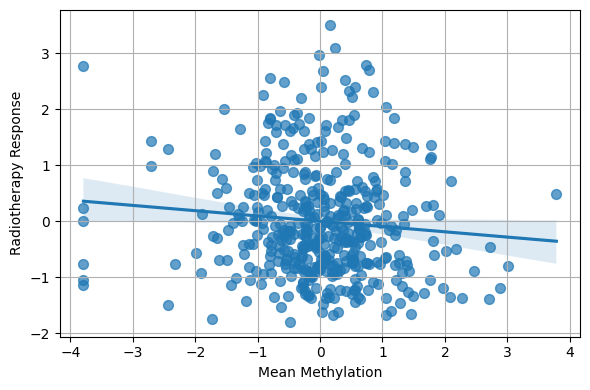

In [66]:
# Step 1: Merge all relevant data
merged = (
    y.set_index("id")[["auc"]]  # convert to DataFrame with double brackets
    .join(mean_methylation_2.rename("mean_methylation"))
    .dropna()
)

scaler = StandardScaler()
merged[["mean_methylation", "auc"]] = scaler.fit_transform(merged[["mean_methylation", "auc"]])

plt.figure(figsize=(6, 4))
sns.regplot(
    x='mean_methylation',
    y='auc',
    data=merged,  # use merged instead of subset
    ci=95,
    scatter_kws={'s': 50, 'alpha': 0.7}
)
plt.xlabel("Mean Methylation")
plt.ylabel("Radiotherapy Response")
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
info = pd.read_csv('Radiosensitivity Prediction/data/Cleveland/cleveland_sampleInfo.csv')
info.head()

,CellLine,Primarysite,Histology,Subhistology
0,SKNFI,autonomic_ganglia,neuroblastoma,NS
1,IMR32,autonomic_ganglia,neuroblastoma,NS
2,SKNAS,autonomic_ganglia,neuroblastoma,NS
3,CHP212,autonomic_ganglia,neuroblastoma,NS
4,KPNSI9S,autonomic_ganglia,neuroblastoma,NS


In [83]:
info[info["Primarysite"] == "central_nervous_system"]["Histology"].value_counts()

Histology
glioma                                              31
primitive_neuroectodermal_tumour-medulloblastoma     3
Name: count, dtype: int64

In [84]:
info["Histology"].value_counts()

Histology
carcinoma                                                     387
malignant_melanoma                                             32
glioma                                                         31
rhabdomyosarcoma                                                8
neuroblastoma                                                   7
mesothelioma                                                    7
osteosarcoma                                                    6
Ewings_sarcoma-peripheral_primitive_neuroectodermal_tumour      4
primitive_neuroectodermal_tumour-medulloblastoma                3
rhabdoid_tumour                                                 3
sarcoma                                                         2
chondrosarcoma                                                  2
sex_cord-stromal_tumour                                         1
leiomyosarcoma                                                  1
malignant_fibrous_histiocytoma-pleomorphic_sarcoma              1


In [68]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Step 1: Merge all relevant data
merged = (
    info.set_index("CellLine")
    .join(mean_methylation.rename("mean_methylation"))
    .join(y.set_index("id")["auc"]) 
    .dropna()
)

# Step 2: Group by Primarysite and compute correlation stats
results = []

for site, group in merged.groupby("Histology"):
    if len(group) < 5:
        continue  # skip groups with very few samples (unreliable statistics)

    pearson_corr, pearson_p = pearsonr(group["mean_methylation"], group["auc"])
    spearman_corr, spearman_p = spearmanr(group["mean_methylation"], group["auc"])

    results.append({
        "Histology": site,
        "n_samples": len(group),
        "Pearson_r": pearson_corr,
        "Pearson_p": pearson_p,
        "Spearman_r": spearman_corr,
        "Spearman_p": spearman_p
    })

# Step 3: Create a results DataFrame
results_df = pd.DataFrame(results)

# Step 4: Sort by p-value or other metric if desired
results_df = results_df.sort_values(by="Pearson_p")

# Step 5: Print results
print(results_df.to_string(index=False))


         Histology  n_samples  Pearson_r  Pearson_p  Spearman_r  Spearman_p
malignant_melanoma         30   0.328047   0.076763    0.145273    0.443702
         carcinoma        344  -0.090961   0.092099   -0.093677    0.082752
  rhabdomyosarcoma          6  -0.665996   0.148708   -0.600000    0.208000
            glioma         27  -0.186160   0.352523   -0.181929    0.363766
      osteosarcoma          6  -0.318645   0.538210   -0.028571    0.957155
     neuroblastoma          7   0.198207   0.670084    0.035714    0.939408


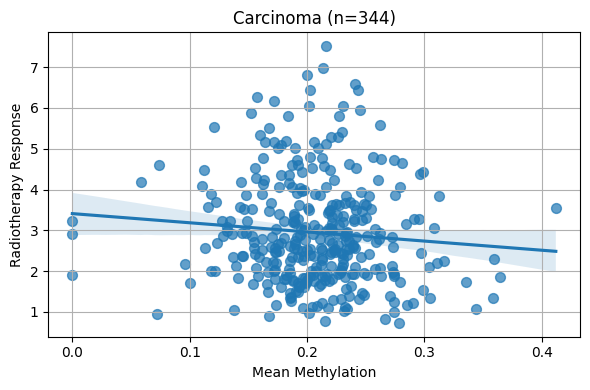

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of tissues to plot
# tissues_to_plot = ['soft_tissue', 'oesophagus', 'kidney']
tissues_to_plot = ['carcinoma']

# Create one scatterplot per tissue
for tissue in tissues_to_plot:
    subset = merged[merged['Histology'] == tissue]

    plt.figure(figsize=(6, 4))
    sns.regplot(
        x='mean_methylation',
        y='auc',
        data=subset,
        ci=95,
        scatter_kws={'s': 50, 'alpha': 0.7}
    )
    plt.title(f"{tissue.title()} (n={len(subset)})")
    plt.xlabel("Mean Methylation")
    plt.ylabel("Radiotherapy Response")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [78]:
!pip install seaborn

Original Methylation data

In [70]:


df = pd.read_csv(f"{wd}/data/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()
df.head()
# df["locus_id"] = df["locus_id"].apply(lambda x : x.split("_")[0])
# df = df.drop(df.columns[1:3], axis=1)
# df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(0.0)
# df = df.groupby("locus_id").mean().T
# df.index = [x.split("_")[0] for x in df.index]
# df = df.loc[~df.index.duplicated(keep="first")]

C:\Users\mmarc\AppData\Local\Temp\ipykernel_6448\2416094097.py:1: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{wd}/data/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()


,locus_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
0,SGIP1_1_66998638_66999638,1:66998970;1:66998973;1:66998993;1:66999404;1:...,25.0,0.00000,0.00000,0.75000,0.00000,0.95239,NaN,1.00000,...,NA,NA,NA,NA,NA,NA,0.03448,0.77660,0.06665,0.66667
1,SGIP1_1_66998251_66999251,1:66998970;1:66998973;1:66998993,8.27,0.00000,NaN,NaN,0.00000,0.94443,NaN,NaN,...,NA,NA,NA,NA,NA,NA,0.00000,NaN,NaN,0.66667
2,AZIN2_1_33545713_33546713,1:33546151;1:33546209;1:33546210;1:33546385;1:...,326.58,0.00729,0.03232,0.33160,0.22042,0.01291,0.03444,0.14411,...,NA,NA,NA,NA,NA,NA,0.04821,0.06721,0.11539,0.00046
3,AZIN2_1_33546778_33547778,1:33546783;1:33546788;1:33546795;1:33546797;1:...,480.54,0.22276,0.07784,0.26034,0.32106,0.27485,0.15940,0.34742,...,NA,NA,NA,NA,NA,NA,0.15045,0.34739,0.30208,0.05159
4,AGBL4_1_50489626_50490626,1:50489632;1:50489641;1:50489671;1:50489677;1:...,263.36,0.00000,0.01216,0.98113,0.56622,0.33960,0.43177,0.93363,...,NA,NA,NA,NA,NA,NA,0.01874,0.19714,0.05052,0.54553


In [71]:
import pandas as pd

# Extract gene, chr, start, end from locus_id
df[['gene', 'chr', 'start', 'end']] = df['locus_id'].str.extract(r'([^_]+)_([^_]+)_([^_]+)_([^_]+)')
df[['start', 'end']] = df[['start', 'end']].astype(int)
df['region_bin'] = df['chr'] + '_' + (df['start'] // 100000).astype(str)

# Drop unnecessary columns
df = df.drop(['locus_id', 'CpG_sites_hg19', 'avg_coverage'], axis=1, errors='ignore')


In [73]:
import numpy as np

In [74]:
df = df.applymap(lambda x: np.nan if str(x).strip().upper() in ['NA', 'NAN', ''] else x)

threshold = df.shape[1] * 0.5  # number of allowed non-NaNs
df_filtered = df[df.isna().sum(axis=1) <= threshold]

df_filled = df_filtered.fillna(0.0)
df_filled.head()

C:\Users\mmarc\AppData\Local\Temp\ipykernel_6448\627137801.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if str(x).strip().upper() in ['NA', 'NAN', ''] else x)


,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,NCIH1184_LUNG,HCC2157_BREAST,...,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG,gene,chr,start,end,region_bin
0,0.00000,0.00000,0.75000,0.00000,0.95239,0.0,1.00000,0.0,0.11864,0.0,...,0.0,0.03448,0.77660,0.06665,0.66667,SGIP1,1,66998638,66999638,1_669
2,0.00729,0.03232,0.33160,0.22042,0.01291,0.03444,0.14411,0.02525,0.22553,0.02029,...,0.0,0.04821,0.06721,0.11539,0.00046,AZIN2,1,33545713,33546713,1_335
3,0.22276,0.07784,0.26034,0.32106,0.27485,0.15940,0.34742,0.28963,0.10735,0.19351,...,0.0,0.15045,0.34739,0.30208,0.05159,AZIN2,1,33546778,33547778,1_335
4,0.00000,0.01216,0.98113,0.56622,0.33960,0.43177,0.93363,0.13089,0.07346,0.00865,...,0.0,0.01874,0.19714,0.05052,0.54553,AGBL4,1,50489626,50490626,1_504
5,0.00000,0.05333,0.02187,0.00000,0.00000,0.00000,0.00000,0.00867,0.00000,0.00680,...,0.0,0.00000,0.00000,0.00000,0.00000,NECAP2,1,16766166,16767166,1_167


region_bin
15_254    28
11_640    21
6_316     19
3_503     19
17_798    17
          ..
11_44      1
11_42      1
11_41      1
11_36      1
1_669      1
Name: count, Length: 9638, dtype: int64

In [ ]:
df_filled['chr'].value_counts()


chr
1         1979
19        1492
2         1428
17        1298
11        1180
3         1159
6         1033
12        1028
7          994
16         993
5          945
9          875
10         836
8          813
4          739
15         718
14         711
20         625
23         615
22         523
13         406
18         315
21         258
24           4
009911       1
Name: count, dtype: int64

Group by chrome

In [144]:
df_filled

,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,NCIH1184_LUNG,HCC2157_BREAST,...,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG,gene,chr,start,end,region_bin
0,0.00000,0.00000,0.75000,0.00000,0.95239,0.0,1.00000,0.0,0.11864,0.0,...,0.0,0.03448,0.77660,0.06665,0.66667,SGIP1,1,66998638,66999638,1_669
2,0.00729,0.03232,0.33160,0.22042,0.01291,0.03444,0.14411,0.02525,0.22553,0.02029,...,0.0,0.04821,0.06721,0.11539,0.00046,AZIN2,1,33545713,33546713,1_335
3,0.22276,0.07784,0.26034,0.32106,0.27485,0.15940,0.34742,0.28963,0.10735,0.19351,...,0.0,0.15045,0.34739,0.30208,0.05159,AZIN2,1,33546778,33547778,1_335
4,0.00000,0.01216,0.98113,0.56622,0.33960,0.43177,0.93363,0.13089,0.07346,0.00865,...,0.0,0.01874,0.19714,0.05052,0.54553,AGBL4,1,50489626,50490626,1_504
5,0.00000,0.05333,0.02187,0.00000,0.00000,0.00000,0.00000,0.00867,0.00000,0.00680,...,0.0,0.00000,0.00000,0.00000,0.00000,NECAP2,1,16766166,16767166,1_167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21332,0.00000,0.00951,0.00552,0.00079,0.04100,0.01047,0.00000,0.00663,0.00000,0.00295,...,0.0,0.00000,0.00000,0.00000,0.00000,CHKB,22,51021428,51022428,22_510
21333,0.00000,0.00000,0.36057,0.19895,0.10039,0.11989,0.02138,0.04334,0.00000,0.13237,...,0.0,0.00000,0.10934,0.01969,0.02364,SYCE3,22,51001381,51002381,22_510
21334,0.00000,0.00000,0.00000,0.09090,0.57140,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.00000,0.00000,0.00000,0.00000,RABL2B,22,51222110,51223110,22_512
21335,0.00000,0.00000,0.07277,0.00263,0.26433,0.04521,0.21740,0.06030,0.00000,0.16394,...,0.0,0.08333,0.00000,0.25713,0.00000,RPL23AP82,22,51194513,51195513,22_511


In [155]:
# Step 1: Drop bad chromosomes
df_filtered_chr = df_filled[~df_filled['chr'].isin(['009911'])]

# Step 2: Define columns to exclude from aggregation
df_filtered_chr = df_filtered_chr.drop(['gene', 'start', 'end', 'region_bin'], axis=1)

df_filtered_chr.iloc[:, :-1] = df_filtered_chr.iloc[:, :-1].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(0.0)
df_filtered_chr

chr_grouped = df_filtered_chr.groupby('chr').mean()

chr_grouped


# # Step 3: Identify purely numeric sample columns
# sample_cols = df_filtered_chr.columns.difference(exclude_cols)
# sample_cols = [col for col in sample_cols if pd.api.types.is_numeric_dtype(df_filtered_chr[col])]

# # Step 4: Group by 'chr' and take mean
# chr_grouped = df_filtered_chr.groupby('chr')[sample_cols].mean()

,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,NCIH1184_LUNG,HCC2157_BREAST,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
chr,,,,,,,,,,,,,,,,,,,,,
1,0.143457,0.162596,0.358096,0.224512,0.263813,0.182693,0.331504,0.191421,0.182199,0.268352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.182248,0.194658,0.190138,0.172579
10,0.148597,0.216184,0.408885,0.253906,0.279905,0.204172,0.364284,0.197331,0.184022,0.318457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.190331,0.199736,0.186993,0.218505
11,0.161058,0.208293,0.380384,0.254615,0.293825,0.209973,0.352489,0.204757,0.192655,0.31671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.19794,0.204754,0.198449,0.200034
12,0.121128,0.161132,0.338902,0.195954,0.238293,0.165925,0.289244,0.169088,0.153445,0.236277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.160148,0.169301,0.161135,0.169709
13,0.127753,0.212933,0.388993,0.217223,0.238022,0.186318,0.363855,0.176555,0.186467,0.273455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.179935,0.177484,0.160453,0.202936
14,0.121372,0.205847,0.376965,0.215309,0.262506,0.190268,0.336793,0.16511,0.162254,0.282181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.173778,0.180094,0.183912,0.19575
15,0.123721,0.190242,0.371104,0.239498,0.266156,0.181892,0.346362,0.171699,0.191861,0.275734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.163773,0.177699,0.168005,0.167544
16,0.162328,0.193668,0.362418,0.245926,0.31381,0.227898,0.321932,0.216076,0.207733,0.297402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.218508,0.218773,0.211827,0.204596
17,0.168217,0.19391,0.361241,0.253965,0.320953,0.230906,0.314788,0.231952,0.210715,0.30387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.221167,0.235628,0.22391,0.196848


In [156]:
df_chr = chr_grouped

df_chr = df_chr.T
df_chr.index = [x.split("_")[0] for x in df_chr.index]
df_chr = df_chr.loc[~df_chr.index.duplicated(keep="first")]
df_chr

chr,1,10,11,12,13,14,15,16,17,18,...,22,23,24,3,4,5,6,7,8,9
DMS53,0.143457,0.148597,0.161058,0.121128,0.127753,0.121372,0.123721,0.162328,0.168217,0.139021,...,0.166122,0.144504,0.001962,0.126281,0.113525,0.124882,0.146929,0.154097,0.143454,0.150132
SW1116,0.162596,0.216184,0.208293,0.161132,0.212933,0.205847,0.190242,0.193668,0.19391,0.179218,...,0.204842,0.220148,0.28971,0.175658,0.173343,0.202187,0.178338,0.205768,0.203535,0.189762
P3HR1,0.358096,0.408885,0.380384,0.338902,0.388993,0.376965,0.371104,0.362418,0.361241,0.42297,...,0.388834,0.38101,0.375103,0.348795,0.403673,0.374507,0.345389,0.388841,0.394806,0.38399
HUT78,0.224512,0.253906,0.254615,0.195954,0.217223,0.215309,0.239498,0.245926,0.253965,0.257386,...,0.281786,0.246245,0.355445,0.218993,0.223189,0.226592,0.212262,0.238544,0.222006,0.25071
UMUC3,0.263813,0.279905,0.293825,0.238293,0.238022,0.262506,0.266156,0.31381,0.320953,0.243897,...,0.328813,0.253305,0.0063,0.235092,0.233634,0.261624,0.227144,0.258622,0.257805,0.286067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UO31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF268,0.182248,0.190331,0.19794,0.160148,0.179935,0.173778,0.163773,0.218508,0.221167,0.157862,...,0.230777,0.165015,0.0,0.147906,0.145597,0.155655,0.162696,0.183901,0.185227,0.203401
SF539,0.194658,0.199736,0.204754,0.169301,0.177484,0.180094,0.177699,0.218773,0.235628,0.186735,...,0.244095,0.195598,0.007525,0.168209,0.162662,0.177925,0.186414,0.199362,0.186628,0.196683
SNB75,0.190138,0.186993,0.198449,0.161135,0.160453,0.183912,0.168005,0.211827,0.22391,0.170666,...,0.245482,0.174476,0.25,0.169069,0.138179,0.17214,0.17021,0.188479,0.185119,0.205519


In [159]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/mean_methylation_grouped_by_chrome.csv'
df_chr.to_csv(file_path, index=True, header=True)

region_bin,009911_0,10_1,10_10,10_1000,10_1002,10_1009,10_1010,10_1011,10_1012,10_1013,...,9_987,9_990,9_991,9_992,9_993,9_994,9_995,9_996,9_998,9_999


### Group by region

In [75]:
df_filled['region_bin'].value_counts()

region_bin
15_254    28
11_640    21
6_316     19
3_503     19
17_798    17
          ..
11_44      1
11_42      1
11_41      1
11_36      1
1_669      1
Name: count, Length: 9638, dtype: int64

In [76]:

df_filtered_chr = df_filled

# Step 2: Define columns to exclude from aggregation
df_filtered_chr = df_filtered_chr.drop(['gene', 'start', 'end', 'chr'], axis=1)

df_filtered_chr.iloc[:, :-1] = df_filtered_chr.iloc[:, :-1].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(0.0)
df_filtered_chr

chr_grouped = df_filtered_chr.groupby('region_bin').mean()

chr_grouped

,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RVH421_SKIN,NCIH1184_LUNG,HCC2157_BREAST,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
region_bin,,,,,,,,,,,,,,,,,,,,,
009911_0,0.00083,0.0,0.00658,0.00357,0.0006,0.00339,0.0,0.0032,0.01003,0.00523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0017,0.0,0.00224
10_1,0.02498,0.0,0.36577,0.0,0.0,0.0,0.1242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00025
10_10,0.00345,0.005487,0.05301,0.004107,0.020337,0.00903,0.00319,0.010147,0.008213,0.007323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000227,0.00021,0.0012
10_1000,0.02528,0.06697,0.88235,0.02348,0.94325,0.07896,0.05294,0.04237,0.01483,0.98385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00287,0.52837,0.00043
10_1002,0.37077,0.236125,0.247315,0.30961,0.390285,0.488815,0.16835,0.373475,0.355035,0.25162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.483185,0.333555,0.55906,0.41651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_993,0.0,0.0,0.58483,0.0,0.05589,0.0,0.8343,0.01105,0.12225,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9_995,0.0,0.0,0.0,0.0,0.003965,0.014865,0.169235,0.0,0.023975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0017,0.034175,0.0,0.0
9_996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df_chr = chr_grouped

df_chr = df_chr.T
df_chr.index = [x.split("_")[0] for x in df_chr.index]
df_chr = df_chr.loc[~df_chr.index.duplicated(keep="first")]
df_chr

region_bin,009911_0,10_1,10_10,10_1000,10_1002,10_1009,10_1010,10_1011,10_1012,10_1013,...,9_986,9_987,9_990,9_991,9_992,9_993,9_995,9_996,9_998,9_999
DMS53,0.00083,0.02498,0.00345,0.02528,0.37077,0.74391,0.0,0.00936,0.288615,0.00169,...,0.0,0.04808,1.0,0.45531,0.0,0.0,0.0,0.0,0.048005,0.43253
SW1116,0.0,0.0,0.005487,0.06697,0.236125,0.0,0.5,0.0,0.448465,0.0,...,0.0,0.41229,1.0,0.009645,0.0,0.0,0.0,0.0,0.054525,0.25225
P3HR1,0.00658,0.36577,0.05301,0.88235,0.247315,0.85,0.96155,0.03288,0.84338,0.03095,...,0.074935,0.92136,1.0,0.50769,0.0118,0.58483,0.0,0.0,0.50206,0.32069
HUT78,0.00357,0.0,0.004107,0.02348,0.30961,0.05555,0.45835,0.0006,0.69288,0.00352,...,0.0,0.73469,0.83784,0.0,0.005,0.0,0.0,0.0,0.602255,0.19744
UMUC3,0.0006,0.0,0.020337,0.94325,0.390285,1.0,0.91665,0.0,0.835415,0.00217,...,0.007635,0.77474,0.82609,0.039125,0.0,0.05589,0.003965,0.0,0.118635,0.76908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UO31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF268,0.0,0.0,0.0,0.0,0.483185,0.0,1.0,0.0,0.401975,0.0,...,0.001475,0.39008,0.79799,0.016345,0.0,0.0,0.0017,0.0,0.0,0.0
SF539,0.0017,0.0,0.000227,0.00287,0.333555,0.0,0.14405,0.0,0.484425,0.0,...,0.0,0.67881,0.8779,0.00012,0.0,0.0,0.034175,0.0,0.512595,0.17147
SNB75,0.0,0.0,0.00021,0.52837,0.55906,0.53408,0.5,0.02177,0.482525,0.0,...,0.0,0.16889,0.92592,0.0,0.0,0.0,0.0,0.0,0.016775,0.17742


In [78]:
file_path = 'C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/mean_methylation_grouped_by_region.csv'
df_chr.to_csv(file_path, index=True, header=True)

In [163]:
a = [1,2,3,4]

In [164]:
a[:(-2)]

[1, 2]

In [168]:
a[-1*(1 + 1):]

[3, 4]

## The imputed data - was it scaled?


In [1]:
import pandas as pd
import numpy as np

In [13]:
hi2 = pd.read_csv('Radiosensitivity Prediction\data\Cleveland\histone_imputed (2).csv')

hi1 = pd.read_csv('Radiosensitivity Prediction\data\Cleveland\histone_imputed (1).csv')

hi = pd.read_csv('Radiosensitivity Prediction\data\Cleveland\histone_imputed.csv')


In [15]:
print(hi1['H3K4me0'])
print(hi1['H3K4me0'].mean())
print(hi1['H3K4me0'].std())

0     -0.17942
1      0.03562
2      0.15719
3      0.00370
4      0.07199
        ...   
888   -0.11946
889   -0.07834
890   -0.31815
891   -0.13062
892   -0.15980
Name: H3K4me0, Length: 893, dtype: float64
-0.05752702127659575
0.24459107960488496


In [17]:

print(hi['H3K4me0'])
print(hi['H3K4me0'].mean())
print(hi['H3K4me0'].std())

0      0.116020
1     -0.058624
2     -0.326129
3     -0.241259
4      0.146283
         ...   
480   -1.871356
481    0.388679
482    0.381281
483   -0.393442
484    0.043758
Name: H3K4me0, Length: 485, dtype: float64
-0.023904498579381442
0.3423714298387892


## importing methylation data

In [18]:
import pandas as pd
import requests
import os
import gzip
import subprocess

wd = "Radiosensitivity Prediction/data"


df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()
df["locus_id"] = df["locus_id"].apply(lambda x : x.split("_")[0])
df = df.drop(df.columns[1:3], axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(0.0)
df = df.groupby("locus_id").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df.to_csv(f"{wd}/Cleveland/CCLE_Methylation_TSS1kb_20181022.csv", index=True)
# os.remove(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt.gz")
# os.remove(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt")

C:\Users\mmarc\AppData\Local\Temp\ipykernel_29464\2011448232.py:10: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()


In [30]:
df3 = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t")

C:\Users\mmarc\AppData\Local\Temp\ipykernel_29464\3450494329.py:1: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t")


In [31]:
df3

,locus_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
0,SGIP1_1_66998638_66999638,1:66998970;1:66998973;1:66998993;1:66999404;1:...,25.0,0.00000,0.00000,0.75000,0.00000,0.95239,NaN,1.00000,...,NA,NA,NA,NA,NA,NA,0.03448,0.77660,0.06665,0.66667
1,SGIP1_1_66998251_66999251,1:66998970;1:66998973;1:66998993,8.27,0.00000,NaN,NaN,0.00000,0.94443,NaN,NaN,...,NA,NA,NA,NA,NA,NA,0.00000,NaN,NaN,0.66667
2,AZIN2_1_33545713_33546713,1:33546151;1:33546209;1:33546210;1:33546385;1:...,326.58,0.00729,0.03232,0.33160,0.22042,0.01291,0.03444,0.14411,...,NA,NA,NA,NA,NA,NA,0.04821,0.06721,0.11539,0.00046
3,AZIN2_1_33546778_33547778,1:33546783;1:33546788;1:33546795;1:33546797;1:...,480.54,0.22276,0.07784,0.26034,0.32106,0.27485,0.15940,0.34742,...,NA,NA,NA,NA,NA,NA,0.15045,0.34739,0.30208,0.05159
4,AGBL4_1_50489626_50490626,1:50489632;1:50489641;1:50489671;1:50489677;1:...,263.36,0.00000,0.01216,0.98113,0.56622,0.33960,0.43177,0.93363,...,NA,NA,NA,NA,NA,NA,0.01874,0.19714,0.05052,0.54553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,SYCE3_22_51001381_51002381,22:51001382;22:51001388;22:51001398;22:5100139...,359.68,0.00000,0.00000,0.36057,0.19895,0.10039,0.11989,0.02138,...,NA,NA,NA,NA,NA,NA,0.00000,0.10934,0.01969,0.02364
21334,RABL2B_22_51222110_51223110,22:51222730,6.38,0.00000,0.00000,0.00000,0.09090,0.57140,0.00000,0.00000,...,NA,NA,NA,NA,NA,NA,0.00000,0.00000,0.00000,0.00000
21335,RPL23AP82_22_51194513_51195513,22:51195083;22:51195404;22:51195430,62.10,0.00000,0.00000,0.07277,0.00263,0.26433,0.04521,0.21740,...,NA,NA,NA,NA,NA,NA,0.08333,0.00000,0.25713,0.00000
21336,RPL23AP82_22_51221156_51222156,22:51222010;22:51222012;22:51222018;22:5122202...,179.18,0.00000,0.00000,0.00000,0.00000,0.00000,0.00274,0.00000,...,NA,NA,NA,NA,NA,NA,0.00000,NaN,0.00000,0.00000


In [24]:

df

file_names = ['CCLE_RRBS_cgi_CpG_clusters_20181119.txt.gz', 'CCLE_RRBS_enh_CpG_clusters_20181119.txt.gz', 'CCLE_RRBS_tss_CpG_clusters_20181022.txt.gz']

In [35]:
df2 = pd.read_csv(f"{wd}/Cleveland/{file_names[0]}", sep="\t")
df2

C:\Users\mmarc\AppData\Local\Temp\ipykernel_29464\2278204195.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(f"{wd}/Cleveland/{file_names[0]}", sep="\t")


,cluster_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
0,1_133124_137563,1:134999,21.37,0.71150,0.50520,NaN,0.92730,1.00000,0.96880,0.91110,...,0.99460,0.89740,1.00000,1.00000,1.00000,0.86900,0.06450,0.88460,0.55320,1.00000
1,1_133124_137563,1:135191;1:135218,33.07,0.53845,0.85485,NaN,0.95349,1.00000,1.00000,0.93940,...,1.00000,0.94444,1.00000,0.61760,0.92425,1.00000,0.50000,1.00000,1.00000,0.89285
2,1_133124_137563,1:135203;1:135208,33.22,0.90000,0.68550,NaN,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,0.77940,0.83335,1.00000,0.92105,1.00000,1.00000,1.00000
3,1_711984_716547,1:713376;1:713388;1:713400;1:713448;1:713450;1...,96.96,0.85480,1.00000,0.93403,0.96773,0.77778,0.78433,0.75811,...,0.55017,0.90447,1.00000,0.92109,0.45908,0.62121,0.78261,0.66667,1.00000,0.96795
4,1_711984_716547,1:713901;1:713921;1:714178;1:714182;1:714199;1...,113.18,0.00000,0.00000,0.13514,0.01299,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81033,22_51156386_51159223,22:51158340;22:51158347,36.52,1.00000,1.00000,0.06250,0.80555,1.00000,1.00000,0.84315,...,1.00000,0.96300,NaN,0.98440,0.62760,1.00000,0.06670,0.10000,0.97220,0.56250
81034,22_51156386_51159223,22:51158529;22:51158594;22:51158595;22:5115869...,289.34,0.97634,0.90329,0.92771,0.96567,0.96366,0.16067,0.89528,...,1.00000,0.90809,0.88660,0.04933,0.26193,1.00000,1.00000,0.96159,0.99623,0.96967
81035,22_51159223_51162060,22:51159313;22:51159316;22:51159328;22:5115933...,208.76,0.97684,0.95130,0.98153,0.90924,0.99387,0.36507,0.97114,...,1.00000,0.84955,0.87081,0.18902,0.50601,0.99115,0.67488,0.98889,0.95853,0.98196
81036,22_51159223_51162060,22:51159611;22:51159630;22:51159638;22:5115973...,465.61,0.93356,0.70654,0.62636,0.95989,0.97883,0.92615,0.91864,...,0.96576,0.97470,0.87919,0.95109,0.77484,0.93760,0.73273,0.90443,0.76923,0.95213


In [33]:
df2

,cluster_id,CpG_sites_hg19,avg_coverage,DMS53_LUNG,SW1116_LARGE_INTESTINE,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UMUC3_URINARY_TRACT,HOS_BONE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,JHUEM7_ENDOMETRIUM,OE21_OESOPHAGUS,MOLT3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HOP62_LUNG,EKVX_LUNG,UO31_KIDNEY,SF268_CENTRAL_NERVOUS_SYSTEM,SF539_CENTRAL_NERVOUS_SYSTEM,SNB75_CENTRAL_NERVOUS_SYSTEM,HOP92_LUNG
0,SGIP1_1,1:66998970;1:66998973,5.44,0.00000,NaN,NaN,0.00000,1.00000,NaN,NaN,...,NaN,NaN,0.00000,0.02780,NaN,NaN,0.00000,NaN,NaN,1.00000
1,SGIP1_2,1:66999404;1:66999412,16.74,0.00000,0.00000,0.75000,0.00000,0.95835,NaN,1.00000,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.77660,0.06665,NaN
2,AZIN2_1,1:33546151;1:33546209;1:33546210;1:33546385;1:...,617.75,0.00992,0.01418,0.20272,0.12528,0.00671,0.01776,0.07882,...,0.09812,0.19178,0.20453,0.02183,0.03616,0.02046,0.03784,0.04902,0.06806,0.00022
3,AZIN2_2,1:33547602;1:33547616;1:33547626;1:33547627;1:...,189.37,0.54185,0.18831,0.57766,0.83960,0.80655,0.65003,0.94924,...,0.89357,0.73953,0.58736,0.89073,0.28140,0.63457,0.32222,0.82266,0.78030,0.13757
4,AZIN2_3,1:33547986;1:33548336,16.68,1.00000,NaN,0.59091,0.96775,0.93332,1.00000,1.00000,...,0.97220,0.50000,1.00000,1.00000,1.00000,NaN,1.00000,1.00000,0.91667,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56141,LOC105373100_2,22:51178021;22:51178022;22:51178065;22:51178299,49.06,0.57144,0.27586,0.12210,0.42763,0.14288,0.00000,0.51436,...,0.78114,0.18750,0.81926,0.26180,0.22189,0.33867,0.02327,0.00833,0.26167,0.05745
56142,LOC105373100_3,22:51178381;22:51179000;22:51179001,20.90,1.00000,0.20833,NaN,0.31580,0.11113,0.28570,1.00000,...,NaN,1.00000,1.00000,1.00000,0.10810,0.56252,0.42590,0.73404,0.31495,0.15250
56143,ACR_1,22:51177940;22:51177960;22:51177966;22:5117796...,95.60,0.82302,0.67272,0.91572,0.58870,0.57693,0.65217,0.96406,...,0.87679,0.44186,0.70499,0.53289,0.37687,0.48012,0.17718,0.12935,0.49331,0.16868
56144,ACR_2,22:51178381,7.01,NaN,NaN,NaN,NaN,NaN,0.28570,1.00000,...,NaN,1.00000,1.00000,1.00000,NaN,1.00000,NaN,0.50000,0.00000,0.24440


In [ ]:
import pandas as pd
import numpy as np

def preprocess_cluster_file(filepath):
    df = pd.read_csv(filepath, sep="\t").dropna(subset=["CpG_sites_hg19"])
    
    # Split CpG_sites_hg19 into multiple rows
    df = df.assign(CpG_site=df["CpG_sites_hg19"].str.split(";")).explode("CpG_site")
    
    # Format CpG_site to match 'chr_pos'
    df["CpG_site"] = df["CpG_site"].str.replace(":", "_", regex=False)
    
    # Drop metadata columns and set CpG_site as index
    df = df.drop(columns=["cluster_id", "CpG_sites_hg19", "avg_coverage"])
    df = df.set_index("CpG_site")
    
    # Convert methylation beta values to float
    df = df.apply(pd.to_numeric, errors="coerce")
    
    # Transpose: rows = samples, columns = CpG_site
    df = df.T
    
    # Optional: handle duplicated CpG_site columns (e.g., take mean if duplicated)
    df = df.groupby(df.columns, axis=1).mean()
    
    # Optional: deduplicate sample names if needed (same as you did before)
    df.index = [x.split("_")[0] for x in df.index]
    df = df.loc[~df.index.duplicated(keep="first")]
    
    return df


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("20231023_092657_latent_joint.csv.gz")

In [4]:
df

,Unnamed: 0,Latent_1,Latent_2,Latent_3,Latent_4,Latent_5,Latent_6,Latent_7,Latent_8,Latent_9,...,Latent_191,Latent_192,Latent_193,Latent_194,Latent_195,Latent_196,Latent_197,Latent_198,Latent_199,Latent_200
0,SIDM00001,-2.67690,1.31233,6.71745,-7.22408,4.39593,6.03053,-4.07662,-8.66109,-9.80994,...,3.28553,-7.17370,8.33654,-1.61591,-2.86224,0.21458,3.61519,0.54568,2.41525,5.31184
1,SIDM00003,-1.59680,0.22701,0.99800,-0.93175,-2.12029,3.08306,-0.50503,1.21367,-2.24603,...,-5.73134,0.84527,-0.81772,2.15160,-0.09483,4.47636,3.98843,-0.10091,-2.95495,-2.56079
2,SIDM00005,-6.62028,-1.10136,2.16311,-3.11435,4.74819,3.70191,-2.43588,-6.79248,0.48620,...,-4.45714,-1.54096,-1.30732,-3.71938,0.39710,2.62773,-7.85803,1.07730,-2.45585,4.18113
3,SIDM00006,-3.93054,-4.68109,3.81550,-3.18986,6.91500,-5.11665,-4.85945,1.82810,-0.44440,...,4.99585,1.67713,-5.37692,-4.18464,1.60232,-4.06202,2.85582,-0.03505,1.06249,2.91934
4,SIDM00007,-3.98063,1.71518,0.55556,-0.80731,2.11910,0.59284,-1.79915,4.85490,3.16456,...,4.54788,0.83266,-3.99318,-4.27405,2.63025,0.18676,2.27653,0.41557,0.39879,1.31611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,SIDM01979,0.70322,-0.92067,2.45309,0.69227,2.05974,-1.70315,-0.74622,3.05906,5.99758,...,3.93718,5.00490,-4.28399,1.45261,1.02692,2.14378,-2.83250,4.66042,-1.88586,0.08960
1519,SIDM01980,-2.05452,2.00183,4.17378,3.07095,3.18883,-0.84621,5.67663,-1.28564,-2.68056,...,0.99268,0.71831,-1.01383,-0.64029,-1.54342,3.71638,2.71634,0.23100,4.77333,-4.52003
1520,SIDM01981,-3.12979,1.87188,3.97362,5.95993,0.98294,-1.80196,5.16034,3.82892,-1.80271,...,4.30464,3.84730,-1.00150,0.19055,-2.28010,4.01230,2.98150,1.59979,0.75255,1.92089
1521,SIDM01983,-2.88323,0.90534,5.29080,-6.45499,4.96333,-0.03051,-3.17696,-2.61010,-2.37051,...,10.27247,2.69866,-4.98986,-0.79298,1.81246,1.21413,-2.15135,0.49103,-3.98437,-1.67507


In [8]:
df = pd.read_csv('Radiosensitivity Prediction/data/Cleveland/histone_modification_data_dropna.csv', index_col=0)

In [11]:
import numpy as np

In [13]:
np.min(df.values)

-10.25374232

# Binary classification - prepare labels

In [1]:
import pandas as pd
import numpy as np

In [2]:
wd = 'Radiosensitivity Prediction/data/Cleveland'

df = pd.read_csv(f"{wd}/cleveland_auc_full.csv", index_col=0)
my_median = df["auc"].median()
print(df["auc"].median())
df

2.74436594063525


,auc
id,
SKNFI,2.861642
IMR32,0.549051
SKNAS,3.258931
CHP212,1.344093
KPNSI9S,2.325173
...,...
HELA,3.516668
LC1SQSF,3.952210
ISHIKAWAHERAKLIO02ER,0.821957


In [40]:
all_vals = df["auc"].values
all_vals_sorted = np.sort(all_vals)
# print(all_vals_sorted[int(np.floor(511/3))])
# print(all_vals_sorted[int(np.floor(2*511/3))])
len(all_vals)

540

In [41]:
df_bin = df
df_bin["auc"] = (df_bin["auc"] > my_median).astype(int)
df_bin

,auc
id,
SKNFI,1
IMR32,0
SKNAS,1
CHP212,0
KPNSI9S,0
...,...
HELA,1
LC1SQSF,1
ISHIKAWAHERAKLIO02ER,0


In [42]:
df_bin["auc"].sum()

270

In [43]:
df_bin.to_csv(f"{wd}/cleveland_auc_binary.csv")

In [3]:
df_mult = df.copy()

class_0 = df["auc"] <= 2
class_1 = (df["auc"] > 2) & (df["auc"] <= 4)
class_2 = (df["auc"] > 4) & (df["auc"] <= 6)
class_3 = df["auc"] > 6

df_mult.loc[class_0, "auc"] = 0
df_mult.loc[class_1, "auc"] = 1
df_mult.loc[class_2, "auc"] = 2
df_mult.loc[class_3, "auc"] = 3


In [4]:
df_mult.to_csv(f"{wd}/cleveland_auc_4classes.csv")

In [55]:
data_type = "all"
df = pd.read_csv(f"Radiosensitivity Prediction/modules_experiment/gsva_scores/gsva_scores_proteomics_imputed_{data_type}.csv", index_col=0)
df.shape

(1521, 2760)

In [8]:
class_counts = np.bincount(df_mult.values.flatten().astype(int))
class_weights = class_counts.sum() / (4 * class_counts)
class_weights

array([0.9       , 0.49270073, 1.35      , 8.4375    ])

## Modules: does xgboost identify important modules?

In [76]:
import os, sys, json, time
import pandas as pd
import json
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from keras.activations import linear, relu, tanh, leaky_relu
from keras.losses import MeanSquaredError
from functools import partial

sys.path.insert(0, os.getcwd())
from architecture.data_utils import *
from architecture.pnet_config import *
from architecture.pipeline import *
from architecture.evaluation import *

from xgboost import XGBRegressor

wd = "Radiosensitivity Prediction"
download_dir = f"{wd}/data"

data_name = "rna_imputed"
number_of_modules = "500"
data_dir = f"{wd}/modules_experiment/gsva_scores"
config["views"] = [("gsva_meth_imp", f"gsva_scores_{data_name}_{number_of_modules}.csv", None, 0 , lambda x:x, lambda x:x)]

run_dir = f"{wd}/runs/runs_test/{data_name}/{number_of_modules}"

if not os.path.exists(download_dir):
    with open(f"{wd}/src/download_data.py") as file:
        exec(file.read())

if not os.path.exists(run_dir):
    os.mkdir(run_dir)

config["data_dir"] = data_dir
config["run_dir"] = run_dir

config["view_alignment_method"] = "drop samples"
config["labels"] = [("cleveland_auc_separated.csv", 0)]
config["tv_split_seed"] = 42
config["inner_kfolds"] = 5
config["outer_kfolds"] = 5
# config["test_samples"] = 0.1
config["use_validation_on_test"] = False
config["val_metric"] = lambda x : r2_score(x["val_df"].ys, x["val_preds"])
config["results_processors"] = [lambda x : save_results(x, save_supervised_result, {"r2" : r2_score,
                                                                                    "explained_variance" : explained_variance_score,
                                                                                    "mse" : mean_squared_error,
                                                                                    "mae" : mean_absolute_error}, 
                                                                          "individual")]
#                                                                           plot_history]
config["train_samples"] =  1.0        
config['val_samples'] = 0.0
config['test_samples'] = 0.0   
# Run XGBoost
gs_params = {
    "model_params": {
        f"depth_{d}_lr_{lr}_n_{n}": {
            "max_depth": d,
            "learning_rate": lr,
            "n_estimators": n,
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "objective": "reg:squarederror",
            "random_state": 42,
        }
        for d in [3]
        for lr in [0.005]
        for n in [800]
    }
}

config["model"] = XGBRegressor
config["run_id"] = "xgb"
config["task"] = "regression"
config["results_processors"] = config["results_processors"]
config["grid_search"] = construct_gs_params(gs_params)

pipeline = MLPipeline(config)
model = pipeline.run_single_split(return_model=True)


2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,228 [MainThread  ] [INFO ]  Beginning run xgb
2025-08-17 18:53:53,237 [MainThread  ] [INFO ]  Configuration file used : {'dataloader': <class 'architecture.data_utils.ConcatMultiViewDataset'>, 'feature_selector': <architecture.pipeline.IdentityProcessor object at 0x0000019781E6A490>, 'feature_preprocessor': <architecture.pipeline.IdentityProcessor object at 0x0000019781E6A430>, 'data_augmentor': <function <lambda> at 0x0000019781E67550>, 'rng_seed': 42, 'tt_split_seed': 42, 'model': <class 'xgboost.sklearn.XGBReg

Directory Radiosensitivity Prediction/runs/runs_test/rna_imputed/500\xgb already exists, overriding may occur
['127399', '143B', '201T', '22RV1', '2313287', '253J', '253JBV', '42MGBA', '451LU', '5637', '59M', '639V', '647V', '697', '769P', '786O', '8305C', '8505C', '8MGBA', '93T449', '94T778', '9505BIK', '95T1000', 'A101D', 'A172', 'A204', 'A2058', 'A253', 'A2780', 'A375', 'A375_CJ1', 'A375_CJ2', 'A375_CJ3', 'A388', 'A3KAW', 'A427', 'A431', 'A498', 'A4FUK', 'A549', 'A673', 'A704', 'ABC1', 'ACCMESO1', 'ACHN', 'ACN', 'AGS', 'ALLPO', 'ALLSIL', 'AM38', 'AML193', 'AMO1', 'AN3CA', 'ANGMCSS', 'ARH77', 'ASH3', 'ASPC1', 'ATN1', 'AU565', 'BALL1', 'BB30HNC', 'BB49HNC', 'BB65RCC', 'BC1', 'BC3', 'BC3C', 'BCP1', 'BCPAP', 'BDCM', 'BE13', 'BE2M17', 'BECKER', 'BEN', 'BFTC905', 'BFTC909', 'BHT101', 'BHY', 'BICR10', 'BICR16', 'BICR18', 'BICR22', 'BICR31', 'BICR56', 'BICR6', 'BICR78', 'BIN67', 'BL41', 'BL70', 'BLUE1', 'BOKU', 'BONNA12', 'BPH1', 'BT12', 'BT16', 'BT20', 'BT474', 'BT483', 'BT549', 'BV173', '

2025-08-17 18:53:53,403 [MainThread  ] [INFO ]  Number of validation samples : 0
2025-08-17 18:53:53,403 [MainThread  ] [INFO ]  Number of validation samples : 0
2025-08-17 18:53:53,403 [MainThread  ] [INFO ]  Number of validation samples : 0
2025-08-17 18:53:53,403 [MainThread  ] [INFO ]  Number of validation samples : 0
2025-08-17 18:53:53,403 [MainThread  ] [INFO ]  Number of validation samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples : 0
2025-08-17 18:53:53,410 [MainThread  ] [INFO ]  Number of test samples

Directory Radiosensitivity Prediction/runs/runs_test/rna_imputed/500\xgb/best already exists, overriding may occur


2025-08-17 18:54:04,084 [MainThread  ] [INFO ]  Saving results


In [77]:
df = pd.read_csv(f"{wd}/modules_experiment/gsva_scores/gsva_scores_{data_name}_{number_of_modules}.csv", index_col=0)
feature_names = df.columns
feature_names

Index(['60', '71', '92', '120', '129', '141', '189', '319', '333', '344',
       ...
       '5110', '5114', '5117', '5123', '5125', '5126', '5130', '5143', '5145',
       '5168'],
      dtype='object', length=500)

In [78]:
model = model.model

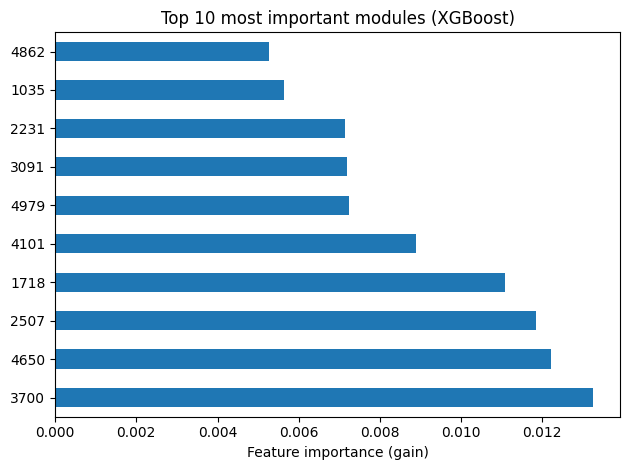

In [79]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(model.feature_importances_, index=feature_names)

feat_imp.sort_values(ascending=False).head(10).plot.barh()
plt.xlabel("Feature importance (gain)")
plt.title("Top 10 most important modules (XGBoost)")
plt.tight_layout()
plt.show()

In [81]:
feat_imp.sort_values(ascending=False, inplace=True)
feat_imp

3700    0.013251
4650    0.012209
2507    0.011840
1718    0.011079
4101    0.008892
          ...   
3076    0.000000
2835    0.000000
2808    0.000000
4760    0.000000
2074    0.000000
Length: 500, dtype: float32

In [70]:
df_sup2 = pd.read_excel(f'{wd}/modules_experiment/Supplementary_Data_2.xlsx', sheet_name='Co-essential Modules', skiprows=2)
df_sup2.set_index('Module #', inplace=True)
df_sup2.head()

,d,Heatmap URL,Synteny,Most-enriched GO term,Most-enriched enrichment,Most-enriched p,2nd-most-enriched GO term,2nd-most-enriched enrichment,2nd-most-enriched p,3rd-most-enriched GO term,...,Unnamed: 722,Unnamed: 723,Unnamed: 724,Unnamed: 725,Unnamed: 726,Unnamed: 727,Unnamed: 728,Unnamed: 729,Unnamed: 730,Unnamed: 731
Module #,,,,,,,,,,,,,,,,,,,,,
1,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,biological process:response to pheromone,19.65925,7.820000e-07,molecular function:complement receptor activity,14.154660,1.030000e-06,molecular function:sialic acid binding,...,ZNF836,ZNF841,ZNF850,ZNF865,ZNF880,ZSCAN1,ZSCAN18,ZSCAN22,ZSCAN5A,ZSCAN5B
2,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,biological process:regulation of ribonuclease ...,18.12179,3.020000e-06,cellular component:keratin filament,9.432067,2.400000e-17,biological process:cornification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,molecular function:ketosteroid monooxygenase a...,30.28929,2.350000e-06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.2,mitra.stanford.edu/bassik/michael/cluster_heat...,Non-syntenic,biological process:homophilic cell adhesion vi...,12.65961,3.980000e-45,biological process:calcium-dependent cell-cell...,10.845270,1.640000e-11,biological process:cell-cell adhesion via plas...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:


for i in range(4):
    print(feat_imp.index[i])
    mod_id = feat_imp.index[i]
    print(df_sup2.loc[int(mod_id), 'Synteny'])
    print(df_sup2.loc[int(mod_id), "Most-enriched GO term"])
    print(df_sup2.loc[int(mod_id), "2nd-most-enriched GO term"])
    print(df_sup2.loc[int(mod_id), "Most-enriched enrichment"])

3700
Non-syntenic
molecular function:interleukin-1 receptor activity
biological process:positive regulation of interleukin-12 biosynthetic process
1130.8
4650
Non-syntenic
biological process:tetrahydrofolate interconversion
biological process:folic acid metabolic process
848.1
2507
Non-syntenic
cellular component:H3 histone acetyltransferase complex
cellular component:MOZ/MORF histone acetyltransferase complex
1211.571
1718
Non-syntenic
cellular component:proteasome core complex, alpha-subunit complex
nan
706.75


### Extract .gz of histone imputed datasets

In [99]:
my_path = "Radiosensitivity Prediction/data/Imputed"
for filename in ["_raw", "_fillna", "_fillsamples"]:
    df = pd.read_csv(f"{my_path}/histone_imputed_2025{filename}.csv.gz")
    df["CellLineName"] = df["CellLineName"].apply(lambda x : x.split("_")[0])
    df.set_index("CellLineName", inplace=True)
    # df.to_csv(f"{my_path}/histone_imputed_2025{filename}.csv", index=True)
    print(df.shape)

(1656, 42)
(893, 42)
(897, 42)


## restrict rna samples to hisotne ones

In [5]:
import pandas as pd

In [10]:
data_dir = 'Radiosensitivity Prediction/data/Cleveland'
histone = pd.read_csv(f'{data_dir}/histone_modification_data_process_na.csv', index_col=0).dropna()
rna = pd.read_csv(f'{data_dir}/rna_imputed.csv', index_col=0)
meth = pd.read_csv(f'{data_dir}/methylation_imputed.csv', index_col=0)

In [12]:
hist_samples = list(histone.index)
common_samples_rna = [sample for sample in hist_samples if sample in rna.index ]
rna_restricted = rna.loc[common_samples_rna]
rna_restricted.to_csv(f'{data_dir}/rna_imputed_432samples_histone_processed_na.csv', index=True)

common_samples_meth = [sample for sample in hist_samples if sample in meth.index ]
meth_restricted = meth.loc[common_samples_meth]
meth_restricted.to_csv(f'{data_dir}/meth_imputed_432samples_histone_processed_na.csv', index=True)

In [9]:
rna_restricted

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
id,,,,,,,,,,,,,,,,,,,,,
DMS53,1.10815,3.37487,1.68671,-6.29946,0.44092,5.64639,7.75496,-4.87721,4.61905,6.27377,...,5.54883,7.22305,3.24471,4.18627,5.29664,3.82826,5.57124,2.14732,6.38213,6.64304
SW1116,-2.59233,3.16543,-1.49989,-1.53096,1.95513,5.69911,5.93707,-0.90773,3.31779,6.30652,...,5.25774,6.43474,3.27818,4.59887,5.69299,-4.63512,4.53800,7.15111,6.24538,5.39764
UMUC3,2.10452,-5.97534,-2.71795,-6.37111,1.31279,6.43568,4.71023,-3.26554,2.61254,6.34296,...,6.68599,7.06847,1.85285,3.55659,4.68297,-0.50740,5.47027,7.76438,6.52911,6.19335
HOS,2.28313,-3.29495,0.70501,-7.13963,3.00018,6.01022,5.44912,-3.37213,4.35041,6.15426,...,6.39625,7.62866,1.81211,4.05766,4.82387,2.92947,5.31089,7.21264,6.71173,5.99506
SNU449,0.37450,-2.21559,-0.56304,-6.11252,2.41424,5.80918,5.48072,-2.26520,4.03070,5.69053,...,5.75028,7.07793,2.93482,4.58449,4.16799,1.95526,5.18521,7.44248,5.94939,5.51302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RH18,4.71425,-3.71564,1.59364,-3.83974,2.44530,5.62041,5.27357,-3.25807,3.74414,5.60198,...,5.21427,5.16344,1.22623,3.66324,4.34345,-1.83162,5.70441,8.65726,6.19338,5.44474
ML1,3.25048,-2.06393,2.45665,-4.99251,3.71151,5.67949,5.68439,-1.87027,3.43395,5.82519,...,5.23559,6.18450,1.88051,3.68695,4.80845,2.09800,5.38930,7.52939,6.12023,5.61392
OE21,0.08382,-3.52699,-1.47090,1.60923,3.78146,5.82902,5.57496,-0.29588,2.68852,6.70746,...,6.44893,6.92196,1.15309,3.09379,4.99458,-0.49653,4.26461,6.20645,5.91097,6.02599


## temp

In [1]:
from architecture.evaluation import *

c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
wd = "Radiosensitivity Prediction"
data_dir = f"{wd}/modules_experiment/gsva_scores"
data_name = "rna_imputed"
number_of_modules = "500"
run_dir = f"{wd}/runs_multiclass/runs_modules/{data_name}/{number_of_modules}"

evaluate_predictions_like_regression("svm_balanced", run_dir, data_dir)

[fold 0] R²=-0.057973 | MSE=1.922456 | acc=0.533981 | acc_relaxed=0.951456
[fold 1] R²=-0.279792 | MSE=2.022151 | acc=0.533981 | acc_relaxed=0.961165
[fold 2] R²=-0.410007 | MSE=2.282356 | acc=0.514563 | acc_relaxed=0.951456
[fold 3] R²=-0.244343 | MSE=2.223394 | acc=0.514563 | acc_relaxed=0.941748
[fold 4] R²=-0.384754 | MSE=2.854508 | acc=0.500000 | acc_relaxed=0.915094
[summary] saved -> Radiosensitivity Prediction/runs_multiclass/runs_modules/rna_imputed/500\svm_balanced\summary_results_regression.csv


,metric,mean,std
0,auc_r2,-0.275374,0.125169
1,auc_mse,2.260973,0.324279
2,auc_acc,0.519417,0.013026
3,auc_acc_relaxed,0.944184,0.015788
4,auc_acc_relaxed_class_0,0.924353,0.024697
5,auc_acc_relaxed_class_1,0.996000,0.008000
6,auc_acc_relaxed_class_2,0.875385,0.054751
7,auc_acc_relaxed_class_3,0.586667,0.324962


# Calcualte NLL

In [1]:
import numpy as np
import pandas as pd

def nll(y_true, y_pred, sigma=0.2):
    """Gaussian Negative Log Likelihood with fixed sigma."""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)

    const_term = 0.5 * np.log(2 * np.pi * sigma**2)
    error_term = 0.5 * ((y_true - y_pred) ** 2) / (sigma**2)
    return const_term + np.mean(error_term)

def get_nll(result_dir):
    nlls = []
    for fold in range(5):
        df = pd.read_csv(f'{result_dir}/test_{fold}/best/test_results.csv')
        y_true = df["auc"].values
        y_pred = df["auc_pred"].values
        nlls.append(nll(y_true, y_pred))

    nlls = np.asarray(nlls, dtype=float)
    return float(nlls.mean()), float(nlls.std())
